In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as ss

El análisis de regresión es una técnica estadística que se utiliza para modelar e investigar la relación entre dos o más variables.

# **Regresión lineal simple**
**Problema**


Imagina que estás observando cómo cambia la temperatura a lo largo del día. Tomas nota de la hora y de la temperatura correspondiente, y empiezas a notar un patrón: a medida que pasa el tiempo en la mañana, la temperatura tiende a subir.

La regresión lineal simple es una herramienta que nos permite ponerle una regla matemática a ese tipo de patrones. Es como trazar una línea recta que se ajusta lo mejor posible a los puntos que has ido anotando (en este caso, hora vs. temperatura).

Esa línea nos ayuda a predecir o entender la relación entre dos cosas: una que usamos para predecir (por ejemplo, la hora del día), y otra que queremos conocer o explicar (como la temperatura).

En resumen: la regresión lineal simple busca la mejor línea recta que explique cómo una variable afecta a otra.

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving datos_regresion_lineal.xlsx to datos_regresion_lineal.xlsx


In [ ]:
df=pd.read_excel('datos_regresion_lineal.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (min)      50 non-null     int64  
 1   Temperatura (°C)  50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 932.0 bytes


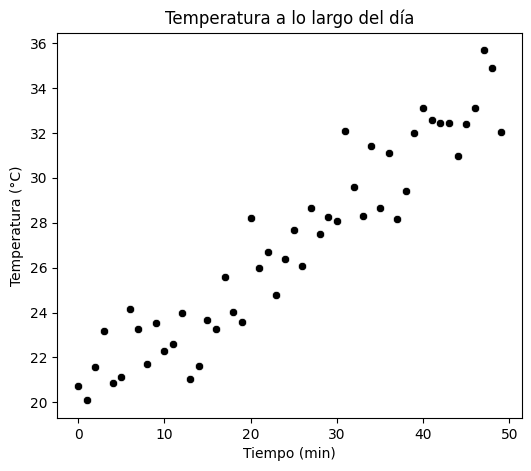

In [ ]:
# ¿ Podemos aproximar este conjunto de datos por una línea recta?
fig=plt.figure(figsize=(6,5))
sns.scatterplot(x=df['Tiempo (min)'],y=df['Temperatura (°C)'],color='black')
plt.title('Temperatura a lo largo del día')
plt.show()
# Si !! si visualmente podemos aproximar el conjunto de puntos por una línea recta
# Ahora debemos determinar b_0 y b_1 para definir la recta de regresión lineal



Para una **regresión lineal simple**, se considera un sólo regresor (variable de regresión) o predictor $x$ y una variable de respuesta $Y$.


Se asume que la distribución de $Y$ es normal,con media $E[Y |x]$ dependiente de $x$ y una varianza constante que no varía con $x$ la cual denotaremos
por $\sigma^2$. En resumen, estamos asumiendo que:
$$
Y\sim norm(E[Y |x],\sigma^2)
$$


En el modelo de regresión más simple con el que se trabaja se asume que la media condicionada
$E[Y |x]$ es una función lineal de $x$, en otras palabras, se asume que:
$$
E[Y|x]=\beta_0+\beta_1 x
$$

Las hipótesis asumidas en las ecuaciones anteriores, podemos expresarlas conjuntamente diciendo que
la variable de respuesta  $Y$ se puede expresar como:
$$
Y = \beta_0 + \beta_1x + \epsilon
$$
donde
$$
\epsilon \sim Norm(0, \sigma^2)
$$


**Observación:**

- $\beta_0$ y $\beta_1$ son coeficientes de regresión desconocidos y  $\epsilon$ es un error aleatorio con media cero y varianza $\sigma^2$.



**Obsevación 2:**

- Se trabaja bajo el supuesto que $\sigma^2$ es constante, por lo tanto, se puede demostrar que la variabilidad de $y$  en un valor particular de $x$ está determinado por la varianza del error, $\sigma^2$.



**Observación 3**

-  Se espera que la recta ajustada esté más cerca de la verdadera recta de regresión, cuando se disponga de una mayor cantidad de datos.

El método que se utilizará para estimar los coeficientes de regresión, se conoce como **El método de los mínimos cuadrados**

## Método de los mínimos cuadrados

Se supone que cada observación $y$, puede describirse según el modelo.
$$
y=\beta_0+\beta_1x+ϵ
$$
donde $\epsilon$ es el error aleatorio de media 0 y varianza $\sigma^2$.

El método de los mínimos cuadrados, consiste en minimizar la suma de los cuadrados de los errores de cada observación, es decir, minimizar
$$
L=\sum_{i=1}^n \epsilon_i^2=\sum_{i=1}^n(y_i-\beta_0-\beta_1x_i)^2
$$
Así los estimadores de mínimos cuadrados de $\beta_0$ y $\beta_1$, por ejemplo
$\hat{\beta}_0$ y $\hat{\beta}_1$, deben satisfacer
\begin{align*}
\left.\frac{\partial L}{\partial \beta_0}\right|_{\hat{\beta}_0,\hat{\beta}_1}=&-2\sum_{i=1}^2(y_i-\beta_0-\beta_1x_i)^2=0\\
\left.\frac{\partial L}{\partial \beta_1}\right|_{\hat{\beta}_0,\hat{\beta}_1}=&-2\sum_{i=1}^2(y_i-\beta_0-\beta_1x_i)^2x_i=0\\
\end{align*}
de donde obtenemos el siguiente resultado.


Las estimaciones de mínimos cuadrados del coeficiente de posición $\beta_0$ y la pendiente del modelo de regresión lineal simple son
$$
\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}
$$

$$
\hat{\beta}_1=\frac{\sum_{i=1}^ny_ix_i-\dfrac{\sum_i x_i\sum_i x_i}{n}}{\sum_{i=1}^nx_i^2-\dfrac{\sum_{i=1}^n\left(x_i\right)^2}{n}}=\frac{S_{xy}}{S_{xx}}
$$

donde $\bar{y}=(1/n)\sum_i y_i$ y $\bar{x}=(1/n)\sum_i x_i$.

Por lo tanto, la recta de regresión ajustada ajustada (estimada) es:
$$
\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1x_i
$$



- $\hat{y}_i$ son las estimaciones de la variable de respuesta $y_i$
- $\hat{\beta}_0$ corresponde a una estimación de $\beta_0$
- $\hat{\beta}_1$ corresponde a una estimación de $\beta_1$

**Observación**
Definiremos la recta que mejor se ajusta a este conjunto de datos

Temperatura= $\beta_0$+$\beta_1$ Tiempo

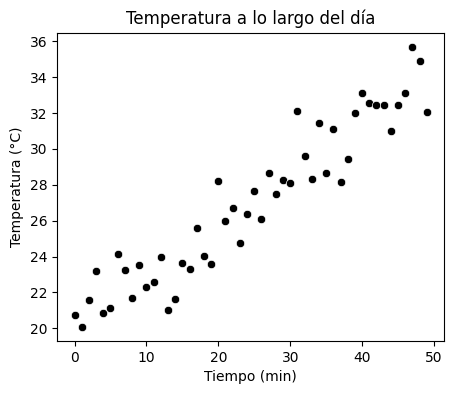

In [ ]:
fig=plt.figure(figsize=(5,4))
sns.scatterplot(x=df['Tiempo (min)'],y=df['Temperatura (°C)'],color='black')
plt.title('Temperatura a lo largo del día')
plt.show()

In [ ]:
X=df['Tiempo (min)'] # variable regresora
y=df['Temperatura (°C)']

In [ ]:
# Como la recta de regresión lineal no pasa por el origen, debemos añadir un vector constante
X=sm.add_constant(X)

In [ ]:
modelo=sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Temperatura (°C)   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     428.9
Date:                Tue, 13 May 2025   Prob (F-statistic):           1.41e-25
Time:                        23:36:39   Log-Likelihood:                -86.415
No. Observations:                  50   AIC:                             176.8
Df Residuals:                      48   BIC:                             180.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.0967      0.388     51.861      0.000      19.318      20.876
Tiempo (min)     0.2822      0.014     20.711      0.000       0.255       0.310
==============================================================================
Omnibus:                        0.453   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.608
Skew:                           0.156   Prob(JB):                        0.738
Kurtosis:                       2.559   Cond. No.                         56.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Los valores de b_0 y b_1 son
parametros=modelo.params

In [ ]:
print(f' Temperatura= {parametros.iloc[0]}+ {parametros.iloc[1]} * Tiempo')

 Temperatura= 20.096664638304453+ 0.2822499797474014 * Tiempo


In [ ]:
from statsmodels.graphics.regressionplots import abline_plot

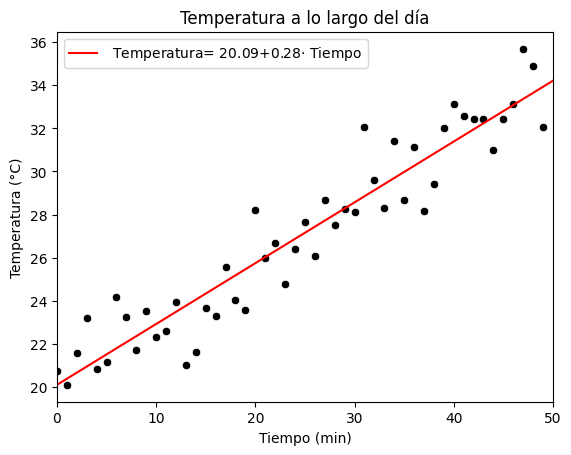

In [ ]:
fig,ax=plt.subplots()
sns.scatterplot(x=df['Tiempo (min)'],y=df['Temperatura (°C)'],color='black')
abline_plot(model_results=modelo,ax=ax,color='red', label=f' Temperatura= 20.09+0.28$\cdot$ Tiempo')
plt.title('Temperatura a lo largo del día')
plt.xlim(0,50)
plt.legend()
plt.show()


**Observación:**

Cada par de observaciones, satisface la relación
$$
y_i=\hat{\beta}_0+\hat{\beta}_1x_i+\epsilon_i,\qquad i=1,2,\cdots,n
$$
Donde $\epsilon_i=y_i-\hat{y}_i$ corresponde al error residual.



**Ejercicio:**

Se propone desarrollar un modelo de regresión lineal simple donde la variable dependiente (o regresada) es el precio de venta de un producto o inmueble, y la variable independiente (o regresora) son los impuestos asociados a dicho bien. El objetivo del modelo es analizar la relación lineal entre los impuestos pagados y el precio final de venta, permitiendo predecir el precio de venta estimado en función de los impuestos aplicados (Ejemplo1.csv)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving predicciones.csv to predicciones.csv
Saving Dolar_petroleo.xlsx to Dolar_petroleo.xlsx
Saving Ejemplo1.csv to Ejemplo1.csv


In [ ]:
ejemplo=pd.read_csv('Ejemplo1.csv')

In [ ]:
ejemplo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       98 non-null     int64  
 1   Impuestos        98 non-null     float64
 2   Precio de venta  98 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [ ]:
#variable regresora
X=ejemplo['Impuestos']
y=ejemplo['Precio de venta']

In [ ]:
X=sm.add_constant(X)

1. Suponiendo que un modelo de regresión lineal es apropiado, obtener el ajuste de mínimos cuadrados que relacione el precio de venta con los impuestos.



In [ ]:
# Modelo de regresión lineal
modelo2=sm.OLS(y,X).fit()
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Precio de venta   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.616e+06
Date:                Tue, 13 May 2025   Prob (F-statistic):          1.11e-204
Time:                        23:55:15   Log-Likelihood:                -494.45
No. Observations:                  98   AIC:                             992.9
Df Residuals:                      96   BIC:                             998.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.354e+04     17.034    794.977      0.000    1.35e+04    1.36e+04
Impuestos      3.3215      0.003   1271.396      0.000       3.316       3.327
==============================================================================
Omnibus:                        2.532   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                1.995
Skew:                           0.196   Prob(JB):                        0.369
Kurtosis:                       3.579   Cond. No.                     2.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modelo2.params

,0
const,13541.606754
Impuestos,3.321464


Sol:

**Precio de venta= 13541+ 3.321* Impuestos**

(Estimaciones del precio de venta, dados los impuestos)

2. Determinar las predicciones del precio de venta de los inmuebles, cuando los impuestos son los que se informan en **predicciones.csv**

In [ ]:
impuestos=pd.read_csv('predicciones.csv')

In [ ]:
# Queremos determinar las predicciones del precio de venta
impuesto=sm.add_constant(impuestos['0']) # Se debe agregar el término constante en cada observación para obtener las predicciones

In [ ]:
# y= B_1 X

In [ ]:
modelo2.predict(impuesto).round()
# Predicciones del precio de venta del inmueble, dado los impuestos dados en el dataset 'predicciones.csv'

,0
0,48803.0
1,37692.0
2,38836.0
3,51350.0
4,42160.0
5,66077.0
6,53488.0
7,21799.0
8,64483.0
9,29872.0


3. Determinar los términos residuales

In [ ]:
# Residuales= Observaciones - predicciones
residuales=modelo2.resid

## **Supuestos a tener en consideración** :

1. Independencia de los términos residuales, es decir el término del error de una observación, no debe estar correlacionado con otra.

$$
corr(\epsilon_i,\epsilon_j)=0
$$

2. Homocedasticidad, equivalentemente $\mathrm{var}(\epsilon_i)=\sigma^2$

3. El número de datos, debe ser mayor que el número de parámetros por estimar .

4. No existe un conjunto de números $\lambda_1,\mathrm{y}\,\lambda_2$, diferentes de 0, tales que
$$
\lambda_1 x_1+ \lambda_2 x_2=0
$$
(no existe correlación entre las variables regresoras). Es muy importante que las variables regresoras, no se relacionen entre sí

5. $$
\epsilon_i\sim N(0,\sigma)
$$



#1. Homocedastidad ($\sigma^2$ constante)

Uno de los supuestos clave de la regresión lineal es que los residuos $\epsilon_i$ se distribuyen con la misma varianza en cada nivel de la variable regresora. Esta suposición se conoce como homocedasticidad .


**Observación**

Si un modelo de regresión lineal presenta Heterocedastidad, entonces:

- Los intervalos de confianza para los coeficientes reales del modelo, no son exactos.

- Las pruebas de hipótesis poco fiables (ya que los $p_{values}$ son incorrectos).

- El modelo puede subestimar o sobrestimar la variabilidad de los coeficientes, lo que lleva a conclusiones incorrectas.



### Prueba de la heterocedasticidad de Breusch- Pagan

La prueba de Breush- Pagan  evalúa la presencia de homocedastidad  en un modelo de regresión lineal.

Las hipótesis de la prueba, son las siguientes:

$$
H_0: \mathrm{Homocedastidad}\qquad H_1:\mathrm{Heterocedastidad}
$$



Se considera el siguiente modelo de regresión lineal con 1 variables
$$
Y_i=\beta_0+\beta_1x_{1i}+\epsilon_i
$$
(extendiéndose a $k$ variables)

1.- Se estiman los residuos $\hat{\epsilon}_i$

2.- Se realiza la regresión auxiliar, utilizando los residuos al cuadrado como valores de respuesta y se obtiene $R^2$.

3.- Según $H_0$ (no hay heterocedastidad), puede demostrarse que el tamaño de la muestra $n$ multiplicado por $R^2$, sigue la distribución chí-cuadrada con $gl$ (grados de libertad) igual al número de las variables regresoras.

4.- Si el valor chí-cuadrado obtenido, excede al valor chí cuadrado crítico (con el correspondiente $\alpha$) la conclusión es que hay heterocedastidad. Si este no excede el valor chí cuadrado crítico, no hay heterocedastidad.

**Ejemplo:**

Estudiar la heterocedastidad del problema antes planteado (La temperatura a lo largo del día)

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [ ]:
# Terminos residuales
residuos=df['Temperatura (°C)']-modelo.predict()

In [ ]:
# Prueba de B-P
stat,p_value,F_value,F_pvalue=het_breuschpagan(residuos,modelo.model.exog)
# 1. Estadistico BP
# p_valor
# F value
# F_pvalue

In [ ]:
significancia=0.05
if p_value>=significancia:
  print('Se acepta H_0: Hay homocedastidad en los términos residuales')
else:
  print('Se rechaza H_0: Hay heterocedastidad en los términos residuales')

Se acepta H_0: Hay homocedastidad en los términos residuales


#2. Autocorrelación

Uno de los supuestos del modelo de regresión lineal, es que no existe correlación entre los residuales. Es decir, estos términos se asumen como independientes


En este contexto, el modelo clásico de regresión lineal supone
que no existe tal autocorrelación en los residuales $\epsilon_i$.
Es decir
$$
corr(\epsilon_i,\epsilon_j)=0
$$




## Detección de autocorrelación:

### **Prueba $d$ de Durbin Watson**



Una forma de determinar si existe correlación  entre los términos residuales, es utilizando la prueba de Durbin Watson. Se le conoce como estadístico $d$ de
Durbin-Watson, que se define como:
$$
d=\frac{\sum _{t=2}^n(\hat{\epsilon}_t-\hat{\epsilon}_{t-1})^2}{\sum _{t=1}^n \hat{\epsilon}_t^2 }
$$


Observe que, en el numerador del estadístico $d$, el número de observaciones es $n-1$
porque se pierde una observación al obtener las diferencias consecutivas.

La prueba de Durbin-Watson, considera las siguientes hipotésis:

\begin{align*}
H_0:\mathrm{no\,\,existe\,\,correlación\,\,entre\,\,los\,\,términos\,\,residuales}\\
H_1:\mathrm{existe\,\,correlación\,\,entre\,\,los\,\,términos\,\,residuales}
\end{align*}

Como el valor del estadístico $d$ es aproximadamente $2(1-r)$, donde
$$
r=\frac{\sum\hat{\epsilon}_t\hat{\epsilon}_{t-1}}{\sum\hat{\epsilon}_t^2},\quad -1\leq r\leq 1
$$
corresponde a la autocorrelación muestral de los residuos.

Entonces,como $0\leq d \leq 4$, se tiene la siguiente interpretación de este:

1. Si $d=2$, entonces no existe un problema correlación entre los residuales
2. Si $d\to 0$, mayor será la evidencia de una correlación lineal positiva
3. Si $d\to 4$, mayor será la evidencia de una correlación lineal negativa

**Observación:**

Si $1.5\leq d\leq 2.5$ los valores del estadístico son considerados normales, por otro lado si $d$ está fuera de ese rango, podría indicar que existen problemas de correlación

In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Temperatura (°C)   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     428.9
Date:                Wed, 14 May 2025   Prob (F-statistic):           1.41e-25
Time:                        00:20:21   Log-Likelihood:                -86.415
No. Observations:                  50   AIC:                             176.8
Df Residuals:                      48   BIC:                             180.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.0967      0.388     51.861      0.000      19.318      20.876
Tiempo (min)     0.2822      0.014     20.711      0.000       0.255       0.310
==============================================================================
Omnibus:                        0.453   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.608
Skew:                           0.156   Prob(JB):                        0.738
Kurtosis:                       2.559   Cond. No.                         56.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ejemplo:**

Exploraremos la relación entre el tipo de cambio del dólar y los precios de
distintos combustibles en Chile. Para ello, utilizaremos un modelo de regresión lineal simple, que nos permitirá predecir el precio de un combustible basado en el valor del dólar (base de datos Dolar_ Petroleo.xlsx)

In [ ]:
dolar=pd.read_excel('Dolar_petroleo.xlsx')
dolar=dolar.dropna() # No deben haber entradas nulas, para realizar el ajuste de mínimos cuadrados
dolar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 253
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        247 non-null    datetime64[ns]
 1   Dólar        247 non-null    float64       
 2   Gasolina 93  247 non-null    float64       
 3   Gasolina 97  247 non-null    float64       
 4   Kerosene     247 non-null    float64       
 5   Diesel       247 non-null    float64       
 6   GLP          247 non-null    float64       
 7   Fuel Oil     247 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 17.4 KB


1. Use un modelo de regresión lineal simple para predecir el precio de la Gasolina 93 basado en el precio del dólar ¿Cuál es la ecuación del modelo?

**Sol**

Precio de la Gasolina 93 = Variable regresada $y$

Precio del dolar= variable regresora $x$

In [ ]:
y=dolar['Gasolina 93']
X=dolar['Dólar']

In [ ]:
X=sm.add_constant(X)

In [ ]:
modelo3=sm.OLS(y,X).fit()
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gasolina 93   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     29.37
Date:                Wed, 14 May 2025   Prob (F-statistic):           1.43e-07
Time:                        00:26:58   Log-Likelihood:                -1621.7
No. Observations:                 247   AIC:                             3247.
Df Residuals:                     245   BIC:                             3254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9986     99.451      0.312      0.756    -164.889     226.886
Dólar          0.7279      0.134      5.419      0.000       0.463       0.992
==============================================================================
Omnibus:                       10.853   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               20.890
Skew:                           0.156   Prob(JB):                     2.91e-05
Kurtosis:                       4.390   Cond. No.                     6.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. Corroborar si se cumplen los supuestos necesarios para que el modelo de regresión lineal esté bien definido.

In [ ]:
residuales=modelo3.resid

 ### **1. Normalidad de los residuos**

 $$
H_0: \mathrm{Normalidad\, Datos}\qquad H_1: \mathrm{No\,Normalidad\, Datos}
 $$

In [ ]:
 #Prueba de Kolmogorov
 # parámetros muestrales: Residuales
media,std=residuales.mean(),residuales.std()


In [ ]:
# Estándarizar
Z=(residuales-media)/std

In [ ]:
#K-S test
stat,p_value=ss.kstest(Z,'norm')

In [ ]:
# PRueba de hipótesis
if p_value>=significancia:
  print('Los residuos se distribuyen normal')
else:
  print('Los residuos no se distribuyen normal')

Los residuos no se distribuyen normal


### 2. **Homocedastidad**

$$
H_0: \mathrm{Homocedastidad}\qquad H_1:\mathrm{Heterocedastidad}
$$

In [ ]:
estadistico,p_valor,F_valor,p_valueF=het_breuschpagan(residuales,modelo3.model.exog)

In [ ]:
if p_valor>=significancia:
  print('Hay homocedastidad en los términos residuales')
else:
  print('No hay homocedastidad en los términos residuales')

No hay homocedastidad en los términos residuales


### 3. **Autocorrelación**


In [ ]:
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Gasolina 93   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     29.37
Date:                Wed, 14 May 2025   Prob (F-statistic):           1.43e-07
Time:                        00:52:55   Log-Likelihood:                -1621.7
No. Observations:                 247   AIC:                             3247.
Df Residuals:                     245   BIC:                             3254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9986     99.451      0.312      0.756    -164.889     226.886
Dólar          0.7279      0.134      5.419      0.000       0.463       0.992
==============================================================================
Omnibus:                       10.853   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               20.890
Skew:                           0.156   Prob(JB):                     2.91e-05
Kurtosis:                       4.390   Cond. No.                     6.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Como d---> 0, existe evidencia de correlacion entre los términos residuales

3. Utilizando la ecuación del modelo, predecir el precio de la Gasolina 93 cuando el precio del dólar es $900.1,850.63,975.9,916.7,1016.85,996,985$.

  ¿ Qué se puede inferir con respecto a las estimaciones?¿Son confiables?

In [ ]:
# Ingresaremos datos, para realizar predicciones
dolar=pd.DataFrame({'dolar':[900.1,850.6,975.9,916.7,1016.85,996,985]})

In [ ]:
dolar=sm.add_constant(dolar)

In [ ]:
modelo3.predict(dolar).round()

,0
0,686.0
1,650.0
2,741.0
3,698.0
4,771.0
5,756.0
6,748.0
